# Intro to pyinaturalist

**This is a work in progress!**

This will give a quick introduction to things you can do using data from your own iNaturalist observations.


In [1]:
from datetime import datetime, timedelta
from typing import Any, BinaryIO, Dict, Iterable, List, Optional, Tuple

import altair as alt
import ipyplot
import pandas as pd
import requests_cache
from dateutil.relativedelta import relativedelta
from IPython.display import Image
from pyinaturalist import (
    ICONIC_TAXA,
    Observation,
    enable_logging,
    get_observation_histogram,
    get_observation_identifiers,
    get_observation_observers,
    get_observation_species_counts,
    get_observations,
    pprint,
)
from rich import print

enable_logging()

# Use requests-cache to save data from the iNat API
requests_cache.install_cache()

## Exploring observations
This section will cover how to work with observation data. Let's start by searching for all of your own observations:

In [2]:
# Replace with your own username
USERNAME = 'jkcook'

response = get_observations(user_id=USERNAME, page='all')
my_observations = Observation.from_json_list(response)

Take a look at one of the observations to see what information it contains:

In [3]:
print(my_observations[0])

Observation(
    id=30688807,
    created_at=datetime.datetime(2019, 8, 12, 15, 22, 47, tzinfo=tzlocal()),
    captive=False,
    community_taxon_id=78444,
    description='Located in Green Meadows West Prairie\n\nSpecies 
IDs:\nhttps://sites.google.com/site/gmwprairie/gmw-prairie-flora',
    faves=[],
    geoprivacy=None,
    identifications_count=1,
    identifications_most_agree=True,
    identifications_most_disagree=False,
    identifications_some_agree=True,
    license_code='CC-BY-NC',
    location=(41.67206561, -93.72957587),
    mappable=True,
    num_identification_agreements=1,
    num_identification_disagreements=0,
    oauth_application_id=2,
    obscured=False,
    observed_on=datetime.datetime(2019, 8, 12, 10, 16, tzinfo=tzoffset('Etc/UTC', 0)),
    outlinks=[{'source': 'GBIF', 'url': 'http://www.gbif.org/occurrence/2429228652'}],
    out_of_range=None,
    owners_identification_from_vision=False,
    place_guess='Johnston, IA, USA',
    place_ids=[
        1,
        24,
        1582,
        9853,
        59613,
        64422,
        64423,
        66741,
        82256,
        97394,
        116535,
        129109,
        137509,
        154492,
        155074
    ],
    positional_accuracy=12,
    preferences={'prefers_community_taxon': None},
    project_ids=[48611],
    project_ids_with_curator_id=[],
    project_ids_without_curator_id=[48611],
    public_positional_accuracy=12,
    quality_grade='research',
    quality_metrics=[],
    reviewed_by=[1436999, 2115051],
    site_id=1,
    sounds=[],
    species_guess='Rocky Mountain bee plant',
    tags=[],
    updated_at=datetime.datetime(2019, 10, 16, 3, 43, 4, tzinfo=tzlocal()),
    uri='https://www.inaturalist.org/observations/30688807',
    uuid='aea799e1-4754-4eaf-adca-84720cdeaeb2',
    votes=[],
    annotations=[
        [12] 12|13 (0 votes)
    ],
    comments=[],
    identifications=[
        [66501609] 🌱 Species: Peritoma serrulata (Rocky Mountain beeplant) (improving) added
on Aug 12, 2019 by jkcook,
        [74656703] 🌱 Species: Peritoma serrulata (Rocky Mountain beeplant) (supporting) 
added on Oct 16, 2019 by colincroft
    ],
    ofvs=[],
    photos=[
        [47956314] 
https://inaturalist-open-data.s3.amazonaws.com/photos/47956314/original.jpeg?1565623377 
(CC-BY-NC, 1365x2048)
    ],
    project_observations=[
        ProjectObservation(id=33209242, preferences={'allows_curator_coordinate_access': 
True}, project={'id': 48611}, user_id=2115051, uuid='0ae36f62-59e8-4b90-affd-eb1ddb437262')
    ],
    taxon=[78444] 🌱 Species: Peritoma serrulata (Rocky Mountain beeplant),
    user=[2115051] jkcook (Jordan Cook)
)

Here is how some of those fields correspond to what you see on an observation page on iNaturalist.org:
<img src="https://github.com/niconoe/pyinaturalist/raw/main/docs/images/inat-observation-page-annotated.png" />

You'll notice that there are many more fields available; see the [Observation docs](https://pyinaturalist.readthedocs.io/en/latest/modules/pyinaturalist.models.Observation.html) for a complete list.

In many cases, you will want to quickly preview API results without looking through the full details for each result. `pyinaturalist.pprint()` can be used to show a condensed table of almost all response types. Here's an example with just the first 30 results:

In [4]:
pprint(my_observations[:30])

 ID         Taxon ID   Taxon                  Observed on    User     Location              
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  30688807   78444      🌱 Species: Peritom…   Aug 12, 2019   jkcook   Johnston, IA, USA     
                        serrulata (Rocky                                                     
                        Mountain bee plant)                                                  
  30688955   47912      🌱 Species:            Aug 12, 2019   jkcook   Johnston, IA, USA     
                        Asclepias tuberosa                                                   
                        (butterfly milkweed)                                                 
  30689111   53317      🌱 Genus: Verbena      Aug 12, 2019   jkcook   Johnston, IA, USA     
                        (Vervain)                                                            
  30689221   121968     🌽 Species:            Aug 12, 2019   jkcook   Johnston, IA, USA     
                        Andropogon gerardi                                                   
                        (big bluestem)                                                       
  30689306   121968     🌽 Species:            Aug 12, 2019   jkcook   Johnston, IA, USA     
                        Andropogon gerardi                                                   
                        (big bluestem)                                                       
  30689425   128701     🌱 Species:            Aug 12, 2019   jkcook   Johnston, IA, USA     
                        Desmanthus                                                           
                        illinoensis                                                          
                        (Illinois                                                            
                        bundleflower)                                                        
  30689463   121976     🌻 Species: Silphiu…   Aug 12, 2019   jkcook   Johnston, IA, USA     
                        laciniatum (compass                                                  
                        plant)                                                               
  30689506   136376     🌻 Species:            Aug 12, 2019   jkcook   Johnston, IA, USA     
                        Rudbeckia triloba                                                    
                        (Brown-eyed Susan)                                                   
  30689603   121976     🌻 Species: Silphiu…   Aug 12, 2019   jkcook   Johnston, IA, USA     
                        laciniatum (compass                                                  
                        plant)                                                               
  30689780   81594      🌾 Species: Elymus     Aug 12, 2019   jkcook   Johnston, IA, USA     
                        hystrix (bottlebrush                                                 
                        grass)                                                               
  30690105   127907     🌱 Species:            Aug 12, 2019   jkcook   Johnston, IA, USA     
                        Chamaecrista                                                         
                        fasciculata                                                          
                        (partridge pea)                                                      
  30690175   141767     🌱 Species:            Aug 12, 2019   jkcook   Johnston, IA, USA     
                        Veronicastrum                                                        
                        virginicum (Culver's                                                 
                        root)                                                                
  30690204   48678      🌼 Genus: Solidago     Aug 12, 2019   jkcook   Johnston, IA, USA     
                        (goldenrods)                              

### Observation Photos
We can also use [ipyplot](https://github.com/karolzak/ipyplot) to preview observation images. `Observation.photos` contains a list of [Photo](https://pyinaturalist.readthedocs.io/en/latest/modules/pyinaturalist.models.Photo.html#pyinaturalist.models.Photo) objects, and we can use those to get a thumnail URL for first photo from each observation. For image labels, just call `str(observation)` to get a summary of the observation (who/what/when/where).

In [5]:
images = [obs.photos[0].thumbnail_url for obs in my_observations[:15]]
labels = [str(obs) for obs in my_observations[:15]]
ipyplot.plot_images(images, labels)

show html 
 
 
 
 
 
 
 [30688807] 🌱 Species: Peritoma serrulata (Rocky Mountain bee plant) observed on 2019-08-12 10:16:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47956314/square.jpeg?1565623377 
 
 
 
 
 
 
 
 
 
 
 
 [30688955] 🌱 Species: Asclepias tuberosa (butterfly milkweed) observed on 2019-08-12 10:24:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47956594/square.jpeg?1565623542 
 
 
 
 
 
 
 
 
 
 
 
 [30689111] 🌱 Genus: Verbena (Vervain) observed on 2019-08-12 10:26:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47956848/square.jpeg?1565623709 
 
 
 
 
 
 
 
 
 
 
 
 [30689221] 🌽 Species: Andropogon gerardi (big bluestem) observed on 2019-08-12 10:29:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47957018/square.jpeg?1565623831 
 
 
 
 
 
 
 
 
 
 
 
 [30689306] 🌽 Species: Andropogon gerardi (big bluestem) observed on 2019-08-12 10:31:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47960898/square.jpeg?1565626175 
 
 
 
 
 
 
 
 
 
 
 
 [30689425] 🌱 Species: Desmanthus illinoensis (Illinois bundleflower) observed on 2019-08-12 10:31:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47957319/square.jpeg?1565624048 
 
 
 
 
 
 
 
 
 
 
 
 [30689463] 🌻 Species: Silphium laciniatum (compass plant) observed on 2019-08-12 10:34:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47960436/square.jpeg?1565625910 
 
 
 
 
 
 
 
 
 
 
 
 [30689506] 🌻 Species: Rudbeckia triloba (Brown-eyed Susan) observed on 2019-08-12 10:35:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47957474/square.jpeg?1565624160 
 
 
 
 
 
 
 
 
 
 
 
 [30689603] 🌻 Species: Silphium laciniatum (compass plant) observed on 2019-08-12 10:36:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47960945/square.jpeg?1565626207 
 
 
 
 
 
 
 
 
 
 
 
 [30689780] 🌾 Species: Elymus hystrix (bottlebrush grass) observed on 2019-08-12 10:38:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47957975/square.jpeg?1565624459 
 
 
 
 
 
 
 
 
 
 
 
 [30690105] 🌱 Species: Chamaecrista fasciculata (partridge pea) observed on 2019-08-12 10:46:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47958478/square.jpeg?1565624818 
 
 
 
 
 
 
 
 
 
 
 
 [30690175] 🌱 Species: Veronicastrum virginicum (Culver's root) observed on 2019-08-12 10:47:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47958639/square.jpeg?1565624925 
 
 
 
 
 
 
 
 
 
 
 
 [30690204] 🌼 Genus: Solidago (goldenrods) observed on 2019-08-12 10:48:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47958719/square.jpeg?1565624971 
 
 
 
 
 
 
 
 
 
 
 
 [30690327] 🌱 Species: Desmanthus illinoensis (Illinois bundleflower) observed on 2019-08-12 10:49:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47958950/square.jpeg?1565625088 
 
 
 
 
 
 
 
 
 
 
 
 [30726806] 🌱 Species: Securigera varia (purple crownvetch) observed on 2019-08-12 18:40:00-06:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48019864/square.jpeg?1565661460

[30688807] 🌱 Species: Peritoma serrulata (Rocky Mountain bee plant) observed on 2019-08-12 10:16:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47956314/square.jpeg?1565623377 
 
 
 
 
 
 
 
 
 
 
 
 [30688955] 🌱 Species: Asclepias tuberosa (butterfly milkweed) observed on 2019-08-12 10:24:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47956594/square.jpeg?1565623542 
 
 
 
 
 
 
 
 
 
 
 
 [30689111] 🌱 Genus: Verbena (Vervain) observed on 2019-08-12 10:26:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47956848/square.jpeg?1565623709 
 
 
 
 
 
 
 
 
 
 
 
 [30689221] 🌽 Species: Andropogon gerardi (big bluestem) observed on 2019-08-12 10:29:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47957018/square.jpeg?1565623831 
 
 
 
 
 
 
 
 
 
 
 
 [30689306] 🌽 Species: Andropogon gerardi (big bluestem) observed on 2019-08-12 10:31:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47960898/square.jpeg?1565626175 
 
 
 
 
 
 
 
 
 
 
 
 [30689425] 🌱 Species: Desmanthus illinoensis (Illinois bundleflower) observed on 2019-08-12 10:31:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47957319/square.jpeg?1565624048 
 
 
 
 
 
 
 
 
 
 
 
 [30689463] 🌻 Species: Silphium laciniatum (compass plant) observed on 2019-08-12 10:34:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47960436/square.jpeg?1565625910 
 
 
 
 
 
 
 
 
 
 
 
 [30689506] 🌻 Species: Rudbeckia triloba (Brown-eyed Susan) observed on 2019-08-12 10:35:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47957474/square.jpeg?1565624160 
 
 
 
 
 
 
 
 
 
 
 
 [30689603] 🌻 Species: Silphium laciniatum (compass plant) observed on 2019-08-12 10:36:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47960945/square.jpeg?1565626207 
 
 
 
 
 
 
 
 
 
 
 
 [30689780] 🌾 Species: Elymus hystrix (bottlebrush grass) observed on 2019-08-12 10:38:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47957975/square.jpeg?1565624459 
 
 
 
 
 
 
 
 
 
 
 
 [30690105] 🌱 Species: Chamaecrista fasciculata (partridge pea) observed on 2019-08-12 10:46:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47958478/square.jpeg?1565624818 
 
 
 
 
 
 
 
 
 
 
 
 [30690175] 🌱 Species: Veronicastrum virginicum (Culver's root) observed on 2019-08-12 10:47:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47958639/square.jpeg?1565624925 
 
 
 
 
 
 
 
 
 
 
 
 [30690204] 🌼 Genus: Solidago (goldenrods) observed on 2019-08-12 10:48:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47958719/square.jpeg?1565624971 
 
 
 
 
 
 
 
 
 
 
 
 [30690327] 🌱 Species: Desmanthus illinoensis (Illinois bundleflower) observed on 2019-08-12 10:49:00+00:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/47958950/square.jpeg?1565625088 
 
 
 
 
 
 
 
 
 
 
 
 [30726806] 🌱 Species: Securigera varia (purple crownvetch) observed on 2019-08-12 18:40:00-06:00 by jkcook at Johnston, IA, USA 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48019864/square.jpeg?1565661460

We can even get a summary grouped by iconic taxon. Use `ipyplot.plot_class_tabs` to group by label, and use `Observation.taxon.iconic_taxon_name` as the image labels:

In [6]:
images = [obs.photos[0].thumbnail_url for obs in my_observations]
labels = [obs.taxon.iconic_taxon_name for obs in my_observations]
ipyplot.plot_class_tabs(images, labels, max_imgs_per_tab=15)

show html 
 
 
 Actinopterygii Amphibia Animalia Arachnida Aves Fungi Insecta Mammalia Mollusca Plantae Protozoa Reptilia 
 
 
 
 
 0 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48316210/square.jpeg?1565914818 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48518926/square.jpeg?1566091650 
 
 
 
 
 
 
 
 
 
 
 
 1 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49341882/square.jpeg?1566784482 
 
 
 
 
 
 
 
 
 
 
 
 2 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49850214/square.jpeg?1567215633 
 
 
 
 
 
 
 
 
 
 
 
 3 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52559009/square.jpg?1569549516 
 
 
 
 
 
 
 
 
 
 
 
 4 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52559294/square.jpg?1569549815 
 
 
 
 
 
 
 
 
 
 
 
 5 
 https://inaturalist-open-data.s3.amazonaws.com/photos/78845922/square.jpg?1592182506 
 
 
 
 
 
 
 
 
 
 
 
 6 
 https://inaturalist-open-data.s3.amazonaws.com/photos/96319709/square.jpg?1600639138 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48806165/square.jpeg?1566335674 
 
 
 
 
 
 
 
 
 
 
 
 1 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49344164/square.jpeg?1566786023 
 
 
 
 
 
 
 
 
 
 
 
 2 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52559701/square.jpg?1569550218 
 
 
 
 
 
 
 
 
 
 
 
 3 
 https://inaturalist-open-data.s3.amazonaws.com/photos/54264924/square.jpg?1571265088 
 
 
 
 
 
 
 
 
 
 
 
 4 
 https://inaturalist-open-data.s3.amazonaws.com/photos/54547932/square.jpg?1571596918 
 
 
 
 
 
 
 
 
 
 
 
 5 
 https://inaturalist-open-data.s3.amazonaws.com/photos/54594131/square.jpg?1571625490 
 
 
 
 
 
 
 
 
 
 
 
 6 
 https://inaturalist-open-data.s3.amazonaws.com/photos/55346706/square.jpg?1572489565 
 
 
 
 
 
 
 
 
 
 
 
 7 
 https://inaturalist-open-data.s3.amazonaws.com/photos/55346934/square.jpg?1572489984 
 
 
 
 
 
 
 
 
 
 
 
 8 
 https://inaturalist-open-data.s3.amazonaws.com/photos/55515734/square.jpeg?1572742855 
 
 
 
 
 
 
 
 
 
 
 
 9 
 https://inaturalist-open-data.s3.amazonaws.com/photos/56503601/square.jpg?1574046371 
 
 
 
 
 
 
 
 
 
 
 
 10 
 https://inaturalist-open-data.s3.amazonaws.com/photos/56504902/square.jpg?1574047571 
 
 
 
 
 
 
 
 
 
 
 
 11 
 https://inaturalist-open-data.s3.amazonaws.com/photos/92882102/square.jpg?1598912039 
 
 
 
 
 
 
 
 
 
 
 
 12 
 https://inaturalist-open-data.s3.amazonaws.com/photos/136801176/square.jpg?1623873471 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48124306/square.jpeg?1565748760 
 
 
 
 
 
 
 
 
 
 
 
 1 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48159752/square.jpeg?1565793478 
 
 
 
 
 
 
 
 
 
 
 
 2 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48319003/square.jpeg?1565916918 
 
 
 
 
 
 
 
 
 
 
 
 3 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48521409/square.jpeg?1566093350 
 
 
 
 
 
 
 
 
 
 
 
 4 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49342221/square.jpeg?1566784672 
 
 
 
 
 
 
 
 
 
 
 
 5 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49560865/square.jpeg?1566963934 
 
 
 
 
 
 
 
 
 
 
 
 6 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49752383/square.jpeg?1567130076 
 
 
 
 
 
 
 
 
 
 
 
 7 
 https://inaturalist-open-data.s3.amazonaws.com/photos/50083779/square.jpg?1567393681 
 
 
 
 
 
 
 
 
 
 
 
 8 
 https://inaturalist-open-data.s3.amazonaws.com/photos/51780004/square.jpg?1568860025 
 
 
 
 
 
 
 
 
 
 
 
 9 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52028668/square.jpg?1569088635 
 
 
 
 
 
 
 
 
 
 
 
 10 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52077548/square.jpg?1569120015 
 
 
 
 
 
 
 
 
 
 
 
 11 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52183412/square.jpg?1569202551 
 
 
 
 
 
 
 
 
 
 
 
 12 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52184264/square.jpg?1569203094 
 
 
 
 
 
 
 
 


Actinopterygii Amphibia Animalia Arachnida Aves Fungi Insecta Mammalia Mollusca Plantae Protozoa Reptilia 
 
 
 
 
 0 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48316210/square.jpeg?1565914818 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48518926/square.jpeg?1566091650 
 
 
 
 
 
 
 
 
 
 
 
 1 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49341882/square.jpeg?1566784482 
 
 
 
 
 
 
 
 
 
 
 
 2 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49850214/square.jpeg?1567215633 
 
 
 
 
 
 
 
 
 
 
 
 3 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52559009/square.jpg?1569549516 
 
 
 
 
 
 
 
 
 
 
 
 4 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52559294/square.jpg?1569549815 
 
 
 
 
 
 
 
 
 
 
 
 5 
 https://inaturalist-open-data.s3.amazonaws.com/photos/78845922/square.jpg?1592182506 
 
 
 
 
 
 
 
 
 
 
 
 6 
 https://inaturalist-open-data.s3.amazonaws.com/photos/96319709/square.jpg?1600639138 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48806165/square.jpeg?1566335674 
 
 
 
 
 
 
 
 
 
 
 
 1 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49344164/square.jpeg?1566786023 
 
 
 
 
 
 
 
 
 
 
 
 2 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52559701/square.jpg?1569550218 
 
 
 
 
 
 
 
 
 
 
 
 3 
 https://inaturalist-open-data.s3.amazonaws.com/photos/54264924/square.jpg?1571265088 
 
 
 
 
 
 
 
 
 
 
 
 4 
 https://inaturalist-open-data.s3.amazonaws.com/photos/54547932/square.jpg?1571596918 
 
 
 
 
 
 
 
 
 
 
 
 5 
 https://inaturalist-open-data.s3.amazonaws.com/photos/54594131/square.jpg?1571625490 
 
 
 
 
 
 
 
 
 
 
 
 6 
 https://inaturalist-open-data.s3.amazonaws.com/photos/55346706/square.jpg?1572489565 
 
 
 
 
 
 
 
 
 
 
 
 7 
 https://inaturalist-open-data.s3.amazonaws.com/photos/55346934/square.jpg?1572489984 
 
 
 
 
 
 
 
 
 
 
 
 8 
 https://inaturalist-open-data.s3.amazonaws.com/photos/55515734/square.jpeg?1572742855 
 
 
 
 
 
 
 
 
 
 
 
 9 
 https://inaturalist-open-data.s3.amazonaws.com/photos/56503601/square.jpg?1574046371 
 
 
 
 
 
 
 
 
 
 
 
 10 
 https://inaturalist-open-data.s3.amazonaws.com/photos/56504902/square.jpg?1574047571 
 
 
 
 
 
 
 
 
 
 
 
 11 
 https://inaturalist-open-data.s3.amazonaws.com/photos/92882102/square.jpg?1598912039 
 
 
 
 
 
 
 
 
 
 
 
 12 
 https://inaturalist-open-data.s3.amazonaws.com/photos/136801176/square.jpg?1623873471 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48124306/square.jpeg?1565748760 
 
 
 
 
 
 
 
 
 
 
 
 1 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48159752/square.jpeg?1565793478 
 
 
 
 
 
 
 
 
 
 
 
 2 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48319003/square.jpeg?1565916918 
 
 
 
 
 
 
 
 
 
 
 
 3 
 https://inaturalist-open-data.s3.amazonaws.com/photos/48521409/square.jpeg?1566093350 
 
 
 
 
 
 
 
 
 
 
 
 4 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49342221/square.jpeg?1566784672 
 
 
 
 
 
 
 
 
 
 
 
 5 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49560865/square.jpeg?1566963934 
 
 
 
 
 
 
 
 
 
 
 
 6 
 https://inaturalist-open-data.s3.amazonaws.com/photos/49752383/square.jpeg?1567130076 
 
 
 
 
 
 
 
 
 
 
 
 7 
 https://inaturalist-open-data.s3.amazonaws.com/photos/50083779/square.jpg?1567393681 
 
 
 
 
 
 
 
 
 
 
 
 8 
 https://inaturalist-open-data.s3.amazonaws.com/photos/51780004/square.jpg?1568860025 
 
 
 
 
 
 
 
 
 
 
 
 9 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52028668/square.jpg?1569088635 
 
 
 
 
 
 
 
 
 
 
 
 10 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52077548/square.jpg?1569120015 
 
 
 
 
 
 
 
 
 
 
 
 11 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52183412/square.jpg?1569202551 
 
 
 
 
 
 
 
 
 
 
 
 12 
 https://inaturalist-open-data.s3.amazonaws.com/photos/52184264/square.jpg?1569203094 
 
 
 
 
 
 
 
 
 
 
 
 13 
 http

Use `Photo.show()` to see a larger photo from a single observation:

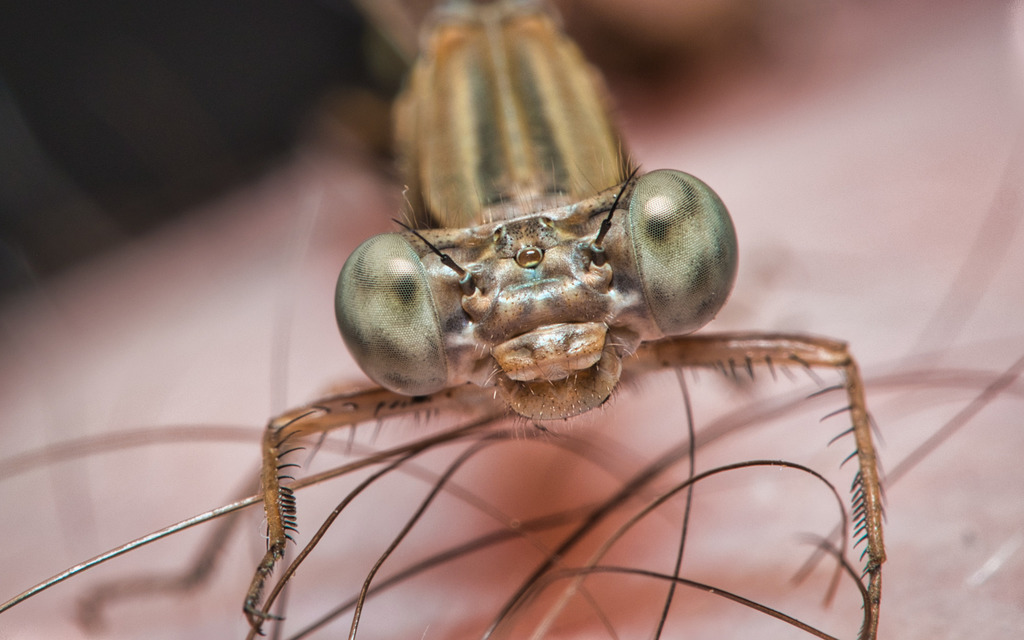

In [9]:
my_observations[-4].photos[0].show()

### Observation histogram
Next, let's make a simple histogram to show your observations over time. We'll do this with [Pandas](https://pandas.pydata.org/docs/getting_started/index.html) and [Altair](https://altair-viz.github.io). Don't worry if you're not familiar with those tools, this is just to demonstrate the kinds of things you can do with your data.

In [10]:
# Optionally limit it to just the last 3 years
start_date = datetime.now() - timedelta(365 * 3)

source = pd.DataFrame(
    [
        {'date': o.observed_on.isoformat(), 'iconic_taxon': o.taxon.iconic_taxon_name}
        for o in my_observations
        if o.observed_on.replace(tzinfo=None) >= start_date
    ]
)
alt.Chart(source).mark_bar().encode(
    x='yearmonth(date):T',
    y=alt.Y(
        'count()',
        scale=alt.Scale(type='log'),
        axis=alt.Axis(title='Number of observations'),
    ),
)

To get a bit more information, let's break down the observations by category (iconic taxon):

In [11]:
alt.Chart(source).mark_bar().encode(
    x='yearmonth(date):T',
    y=alt.Y(
        'count()',
        scale=alt.Scale(type='symlog'),
        axis=alt.Axis(title='Number of observations'),
    ),
    color='iconic_taxon',
)

### Observation map
Next, we can show the observations on a map.

**Note:** This example only shows observations in the US.

In [12]:
from vega_datasets import data

source = pd.DataFrame(
    [
        {
            'latitude': o.location[0],
            'longitude': o.location[1],
            'iconic_taxon': o.taxon.iconic_taxon_name,
        }
        for o in my_observations
        if o.location
    ]
)

# US states background
states = alt.topo_feature(data.us_10m.url, feature='states')
background = (
    alt.Chart(states)
    .mark_geoshape(fill='lightgray', stroke='white')
    .properties(width=850, height=500)
    .project('albersUsa')
)

# Observation points
points = (
    alt.Chart(source)
    .mark_circle()
    .encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
    )
)

# Show the combined background + points
background + points